<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
from skimage.feature import match_template

In [7]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/Object Detection"

In [8]:
img = cv.imread(f'{path_plate}/cats_and_bunnies.jpg')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

template = cv.imread(f'{path_plate}/cat2_templatejpg.jpg', cv.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

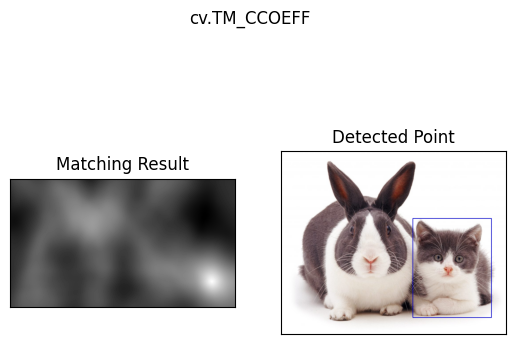

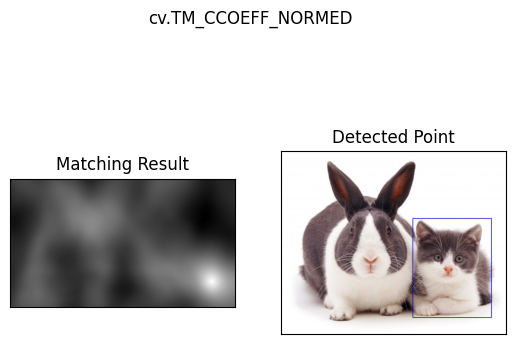

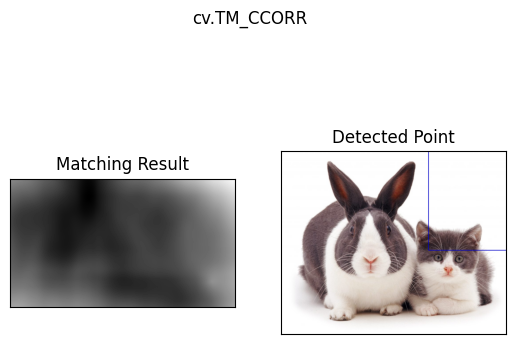

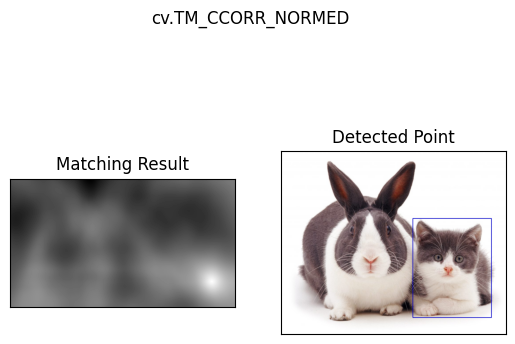

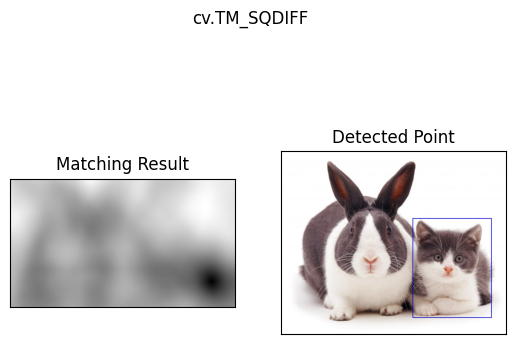

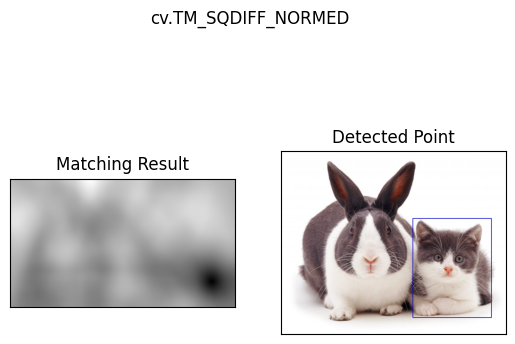

In [9]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(imgGray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img2,top_left, bottom_right, 200, 2)
    plt.subplot(121),plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [11]:
# Baca gambar masukan dan templat
input_image = Image.open(f"{path_plate}/bahrain.jpg")
assert input_image is not None, "File tidak ditemukan!"
template_image = Image.open(f"{path_plate}/bahrain-template.jpg")
assert template_image is not None, "File tidak ditemukan!"

img = np.array(input_image.convert('L'))
template = np.array(template_image.convert('L'))

In [12]:
# Tentukan ambang batas dan variasi rotasi
threshold = 0.45

# Lakukan template matching dengan variasi rotasi
result = match_template(img, template)
locations = np.where(result >= threshold)

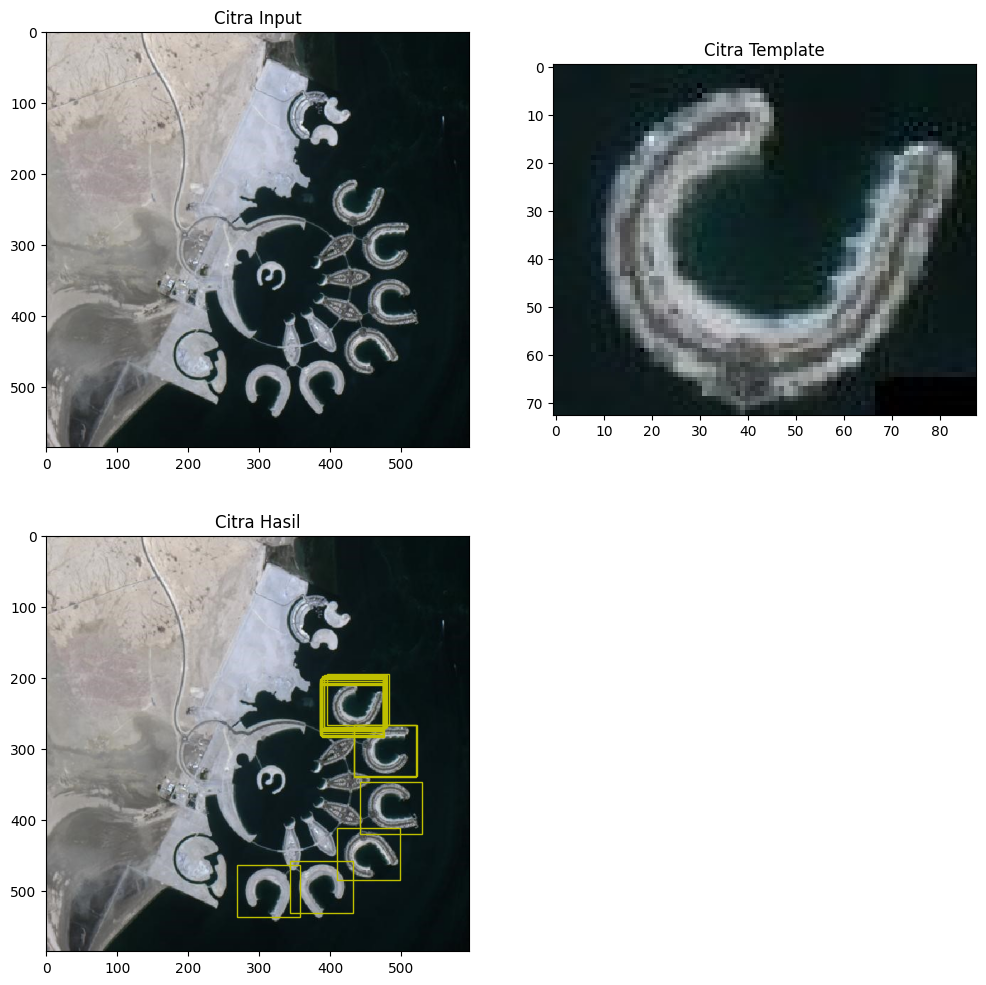

In [13]:
from random import randint

fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

axarr[0][0].imshow(input_image)
axarr[0][0].set_title("Citra Input")

axarr[0][1].imshow(template_image)
axarr[0][1].set_title("Citra Template")

axarr[1][0].imshow(input_image)
axarr[1][0].set_title("Citra Hasil")

fig.delaxes(axarr[1][1])

# Tambahkan kotak di sekitar objek yang terdeteksi
height, width = template.shape
colors = ['y']

his_loc = result.shape
tot = 0
for loc in zip(*locations[::-1]):
    totHis = his_loc[0] - loc[0]
    his_loc = loc
    randC = randint(0, len(colors) - 1)
    if totHis > 5:
        if tot != totHis:
            tot = totHis
            rect = plt.Rectangle(loc, width, height, edgecolor=colors[randC], facecolor='none', linewidth=1)
            axarr[1][0].add_patch(rect)

plt.show()

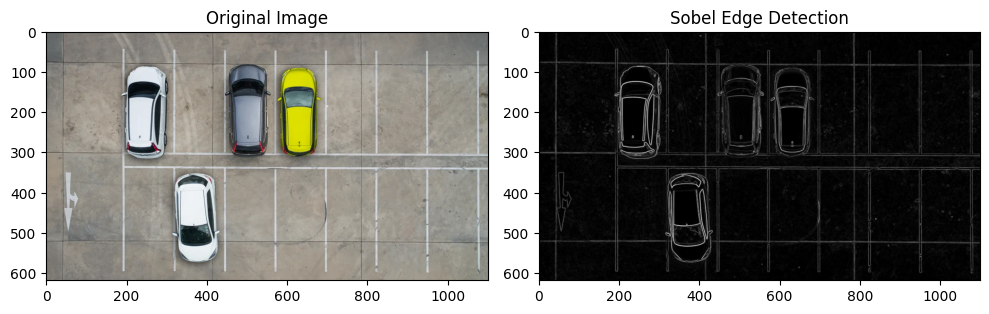

In [20]:
# membaca gambar
img = cv.imread(f'{path_plate}/car-park.jpg')

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Metode Sobel
sobel_x = cv.Sobel(imgGray.copy(), cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(imgGray.copy(), cv.CV_64F, 0, 1, ksize=3)

# Menggabungkan gradien Sobel
sobel_combined = np.hypot(sobel_x, sobel_y)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(222)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_combined, cmap='gray')

plt.tight_layout()
plt.show()

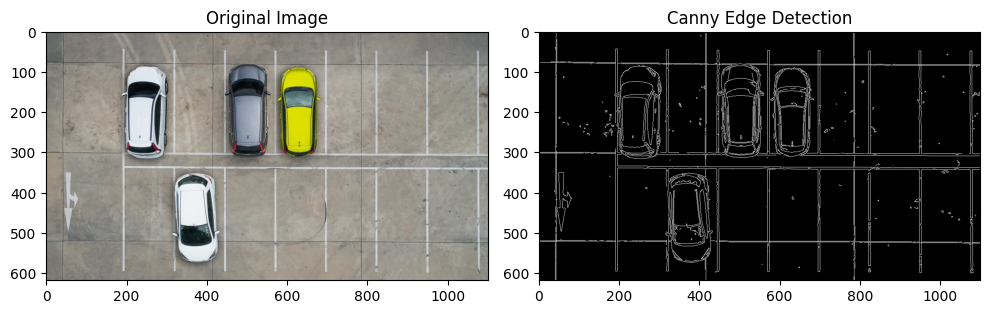

In [21]:
# Canny Edge Detection
edged = cv.Canny(imgGray.copy(), 100, 200)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(222)
plt.title('Canny Edge Detection')
plt.imshow(edged, cmap='gray')

plt.tight_layout()
plt.show()

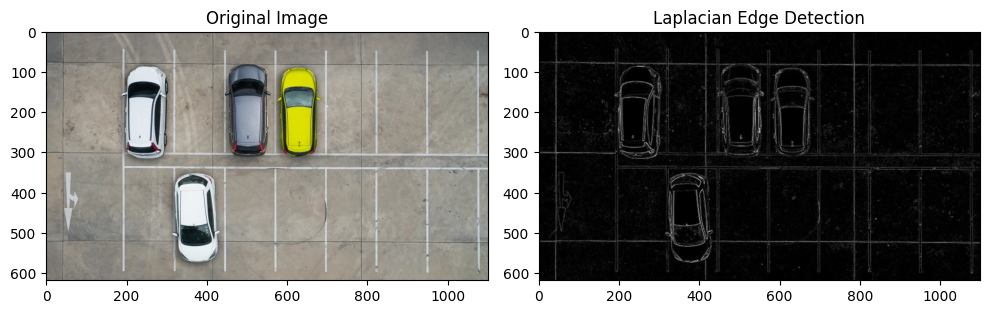

In [22]:
# Laplacian Edge Detection
laplacian = cv.Laplacian(imgGray.copy(), cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(222)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian_abs, cmap='gray')

plt.tight_layout()
plt.show()

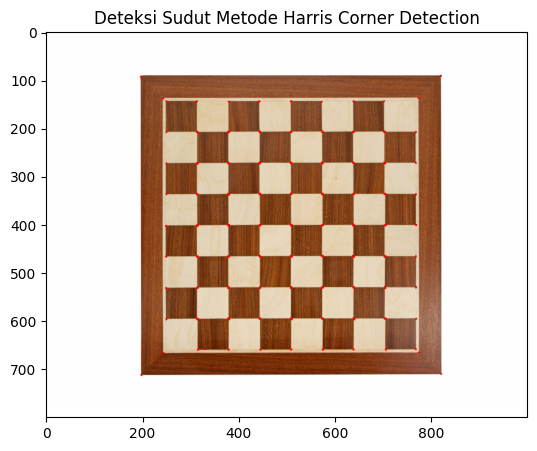

In [24]:
# membaca gambar
imgChess = cv.imread(f'{path_plate}/chess-board.jpg')

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(imgChess, cv.COLOR_BGR2GRAY)
imgChess = cv.cvtColor(imgChess, cv.COLOR_BGR2RGB)


# metode Corner Harris
chrs = cv.cornerHarris(imgGray.copy(), 2, 3, 0.04)

# Dilasi sudut untuk memperjelas tanda sudut
chrs = cv.dilate(chrs, None)

# salin image asli sebelum membuat gambar sudut
imgChrs = imgChess.copy()
# Threshold untuk mengoptimalkan hasil deteksi
imgChrs[chrs > 0.01 * chrs.max()] = [255, 0, 0]

# Tampilkan hasil deteksi
plt.figure(figsize=(10, 5))
plt.title('Deteksi Sudut Metode Harris Corner Detection')
plt.imshow(imgChrs)
plt.show()

<ipython-input-26-d7464bf52ba7>:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


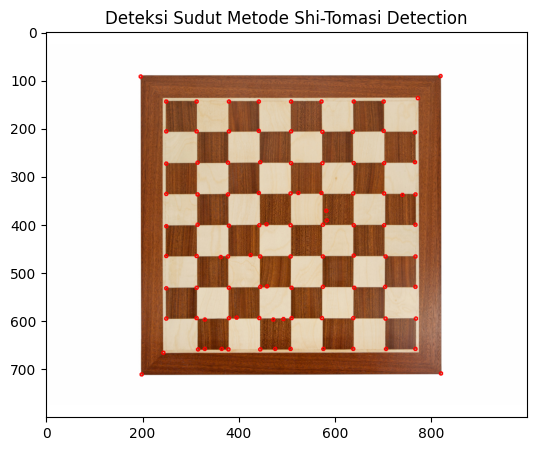

In [26]:
# metode Shi-Tomasi
corners = cv.goodFeaturesToTrack(imgGray.copy(), 100, 0.01, 10)

# Konversi koordinat sudut ke tipe data integer
corners = np.int0(corners)

imgShi = imgChess.copy()

# membuat gambar sudut pada citra asli dengan warna biru
for i in corners:
    x, y = i.ravel()
    cv.circle(imgShi, (x, y), 3, (255, 0, 0), 2)

# Tampilkan hasil deteksi
plt.figure(figsize=(10, 5))
plt.title('Deteksi Sudut Metode Shi-Tomasi Detection')
plt.imshow(imgShi)
plt.show()

In [28]:
# membaca gambar
imgSudoku = cv.imread(f'{path_plate}/sudoku.jpg')

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(imgSudoku, cv.COLOR_BGR2GRAY)
imgSudoku = cv.cvtColor(imgSudoku, cv.COLOR_BGR2RGB)


# Deteksi tepi menggunakan metode Canny
edges = cv.Canny(imgGray, 90, 150, apertureSize=3)

# Dilasi pada tepi untuk menghubungkan komponen yang putus-putus
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Erosi pada tepi untuk menghilangkan noise
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Transformasi Hough untuk mendeteksi garis
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

# Memeriksa apakah garis ditemukan
if not lines.any():
    print('No lines were found')
    exit()

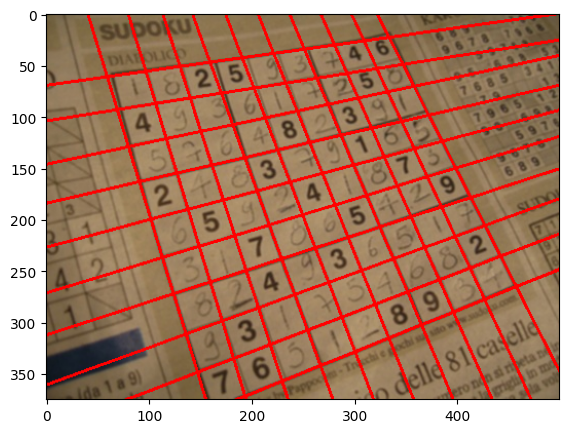

In [29]:
# Filter garis yang sejajar atau berdekatan
if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    similar_lines = {i: [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j:
                continue

            rho_i, theta_i = lines[i][0]
            rho_j, theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) * [True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])
    else:
        filtered_lines = lines

    # Menampilkan garis yang telah difilter pada gambar
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(imgSudoku, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Menampilkan gambar input dengan garis yang telah difilter
    plt.figure(figsize=(10, 5))
    plt.imshow(imgSudoku)

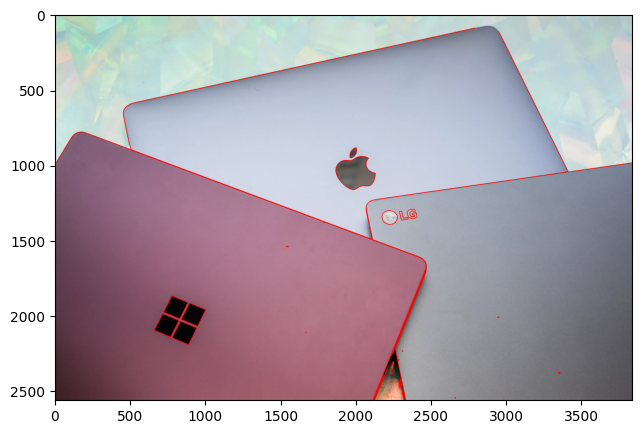

In [30]:
# membaca gambar
imgLaptop = cv.imread(f'{path_plate}/laptop.jpg')

imgGray = cv.cvtColor(imgLaptop, cv.COLOR_BGR2GRAY)
imgLaptop = cv.cvtColor(imgLaptop, cv.COLOR_BGR2RGB)

# Deteksi tepi menggunakan metode Canny dengan threshold 30 dan 200
edged = cv.Canny(imgGray, 30, 200)

# Menemukan kontur pada gambar yang telah dideteksi tepinya
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Menggambar kontur pada gambar asli dengan warna merah
cv.drawContours(imgLaptop, contours, -1, (255, 0, 0), 4)

# Menyiapkan ukuran figur untuk plot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli dengan kontur yang telah digambar
plt.imshow(imgLaptop)

In [33]:
imgKtp = cv.imread(f'{path_plate}/ktp3.png')

# Filtering
blurred = cv.GaussianBlur(imgKtp, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].set_title("Original Image")
axarr[0].imshow(cv.cvtColor(imgKtp, cv.COLOR_BGR2RGB))
axarr[1].set_title("Binary Image")
axarr[1].imshow(bw, cmap='gray')
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'
